In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
GENRES = ["classical", "country", "edm", "hip-hop", "jazz", "pop", "rap", "rnb", "rock"]

In [3]:
all_tracks_df = pd.DataFrame()
for genre in GENRES:
    genre_df = pd.read_pickle(f"../../data/spotify_dataset_{genre}.pkl")
    all_tracks_df = pd.concat([all_tracks_df, genre_df])

# Dropping duplicates
all_tracks_df = all_tracks_df[~all_tracks_df.index.duplicated(keep="first")]
cleaned_tracks_df = all_tracks_df.drop(["artists", "name"], axis=1)

cleaned_tracks_df

,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
5bu9A6uphPWg39RC3ZKeku,classical,0.4540,0.01390,4,-29.966,0,0.0514,0.995000,0.943000,0.0736,0.2440,130.253,184853,4
1Oo7XEqkrwifJn17aA0ocF,classical,0.2990,0.00626,9,-30.923,1,0.0478,0.994000,0.901000,0.0823,0.0634,69.043,378733,4
1upQiytDIEZfl9ItruoXuC,classical,0.0939,0.03360,2,-24.041,0,0.0606,0.927000,0.830000,0.0954,0.0516,67.359,207267,3
47DAIw0cnLLHEXcuUHHC6a,classical,0.5000,0.12800,7,-18.042,1,0.0489,0.953000,0.618000,0.0924,0.2580,101.849,409227,4
3DNRdudZ2SstnDCVKFdXxG,classical,0.1840,0.00527,1,-37.264,0,0.0432,0.995000,0.887000,0.1730,0.1510,170.612,315427,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1Xo5IcDLNOEpcB1RM4mBNF,rock,0.4670,0.85700,7,-6.660,1,0.0366,0.006740,0.000391,0.4500,0.2360,111.001,266227,4
6vUssnJuFxgw1EFG717Kd5,rock,0.4000,0.51600,9,-9.317,1,0.0316,0.779000,0.000024,0.2040,0.5220,145.544,129160,3
2VnkxWob7ooT5NrN9WtctI,rock,0.3480,0.63300,2,-7.025,1,0.0317,0.000285,0.011500,0.1220,0.7140,146.356,246101,4
3T76zPJz3tWL27FrjJe2ot,rock,0.3810,0.83800,6,-6.562,0,0.0709,0.004600,0.000038,0.1010,0.5810,118.214,219400,4


In [4]:
cleaned_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6616 entries, 5bu9A6uphPWg39RC3ZKeku to 0Q2dRzhPWFOex89dOjbq5Y
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             6616 non-null   object 
 1   danceability      6616 non-null   float64
 2   energy            6616 non-null   float64
 3   key               6616 non-null   int64  
 4   loudness          6616 non-null   float64
 5   mode              6616 non-null   int64  
 6   speechiness       6616 non-null   float64
 7   acousticness      6616 non-null   float64
 8   instrumentalness  6616 non-null   float64
 9   liveness          6616 non-null   float64
 10  valence           6616 non-null   float64
 11  tempo             6616 non-null   float64
 12  duration_ms       6616 non-null   int64  
 13  time_signature    6616 non-null   int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 775.3+ KB


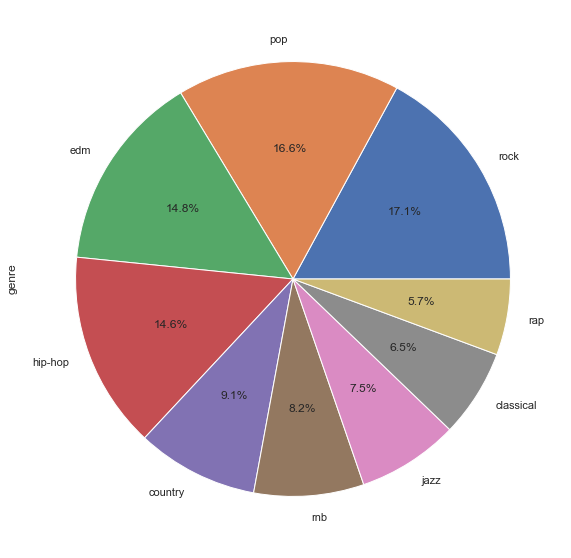

In [5]:
all_tracks_df['genre'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,10));

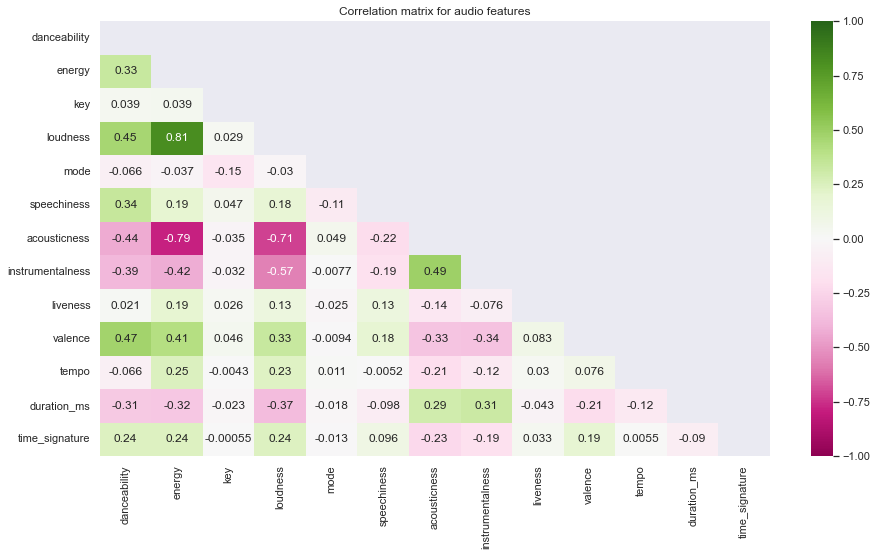

In [8]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(cleaned_tracks_df.corr(), dtype=bool))
sns.heatmap(cleaned_tracks_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="PiYG");
plt.title("Correlation matrix for audio features");

Loudness and Energy seem to have a strong positive correlation. Acousticness and Energy have a strong negative correlation. There are some other weaker relationships too, such as Acousticness/Loudness, Instrumentalness/Loudness, Instrumentalness/Acousticness and Valence/Danceability.

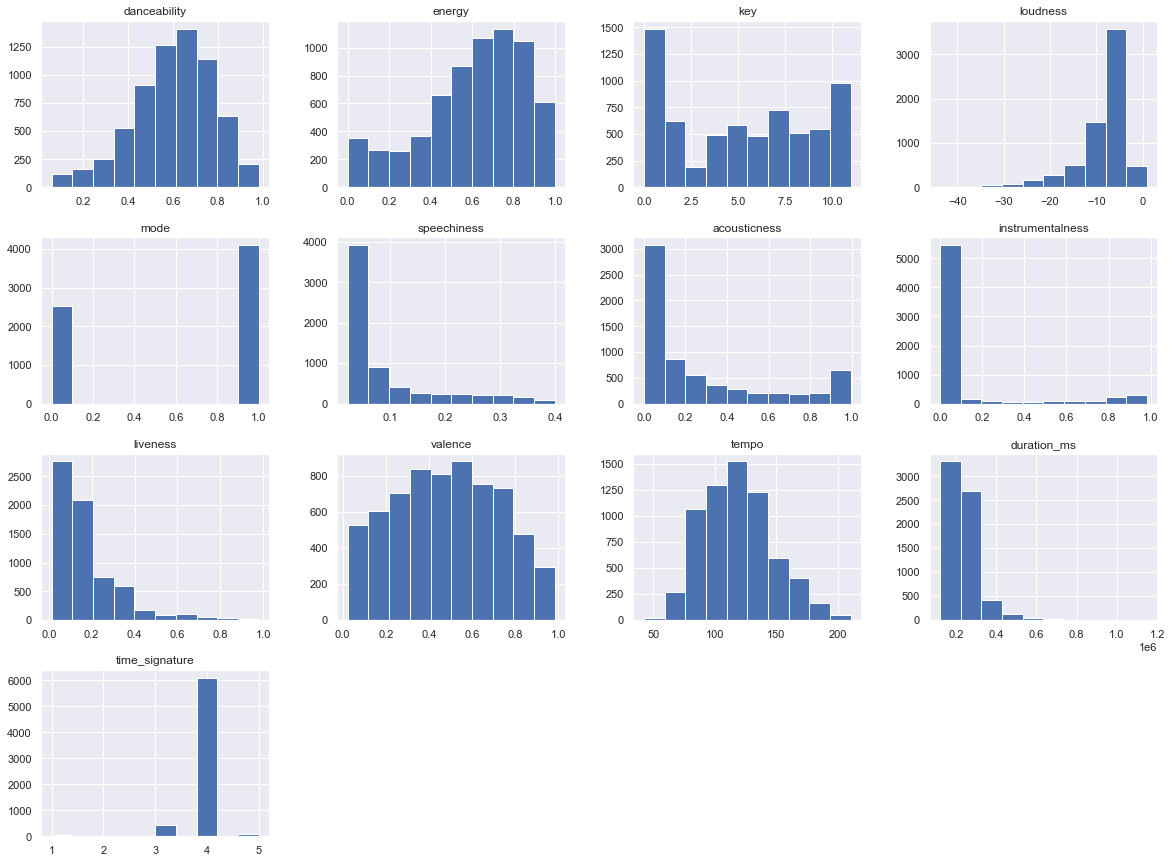

In [7]:
cleaned_tracks_df.hist(figsize=(20,15));

Danceability and Tempo are the most normally distributed (with slight negative and positive skew respectively).

In [8]:
cleaned_tracks_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,6631.000000,6631.000000,6631.000000,6631.000000,6631.000000,6631.000000,6631.000000,6631.000000,6631.000000,6631.000000,6631.000000,6.631000e+03,6631.000000
mean,0.602172,0.607077,5.255919,-8.637084,0.618006,0.093227,0.273074,0.113291,0.178383,0.481571,118.737153,2.396629e+05,3.929724
std,0.177102,0.245664,3.551065,5.643976,0.485912,0.089200,0.320202,0.265305,0.141731,0.244862,28.661549,7.933806e+04,0.350662
min,0.061000,0.000885,0.000000,-43.738000,0.000000,0.022400,0.000003,0.000000,0.013600,0.023700,42.313000,1.201330e+05,1.000000
25%,0.494500,0.465000,2.000000,-10.084000,0.000000,0.036800,0.023300,0.000000,0.092750,0.287000,95.833000,1.918175e+05,4.000000
50%,0.620000,0.652000,5.000000,-6.893000,1.000000,0.050300,0.122000,0.000013,0.121000,0.485000,119.930000,2.232630e+05,4.000000
75%,0.729000,0.798000,8.000000,-5.110500,1.000000,0.108500,0.433500,0.008215,0.222000,0.675500,135.068000,2.655875e+05,4.000000
max,0.983000,0.998000,11.000000,0.915000,1.000000,0.400000,0.996000,0.982000,0.979000,0.985000,210.857000,1.148947e+06,5.000000
